In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
import os
config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.9
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import math
# Importing Deep Learning Libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop

In [3]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

In [4]:
picture_size = 48
folder_path = "C:\\Users\\adila\\Documents\\dip project\\images\\"

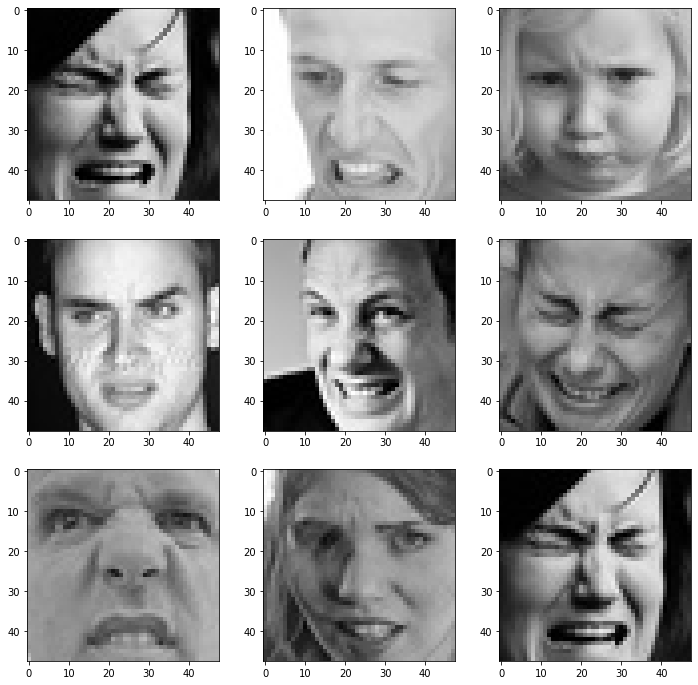

In [5]:
expression = 'disgust'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

In [6]:
batch_size  = 128

datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(folder_path+"train",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


test_set = datagen_val.flow_from_directory(folder_path+"validation",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [7]:
from tensorflow.keras.optimizers import Adam,SGD,RMSprop


no_of_classes = 7

model = Sequential()


model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))


model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))


model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())


model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))



model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))



opt = Adam(lr = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 128)       5

C:\Users\Aman\anaconda3\envs\tf-gpu\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [8]:
epochs = 80

model.compile(loss='categorical_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])

In [9]:
BATCH_SIZE=128

TRAINING_SIZE =28821

VALIDATION_SIZE =7066
compute_steps_per_epoch = lambda x: int(math.ceil(1. * x / BATCH_SIZE))
steps_per_epoch = compute_steps_per_epoch(TRAINING_SIZE)
val_steps = compute_steps_per_epoch(VALIDATION_SIZE)
print(steps_per_epoch)
print(val_steps)

226
56


In [10]:
history = model.fit_generator(generator=train_set,
#                                 steps_per_epoch=train_set.n//train_set.batch_size,
                              steps_per_epoch=226, 
                                epochs=epochs,
                                validation_data = test_set,
#                                 validation_steps = test_set.n//test_set.batch_size,
                              validation_steps=56
                                )

C:\Users\Aman\anaconda3\envs\tf-gpu\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/80
226/226 [==============================] - 407s 2s/step - loss: 1.7714 - accuracy: 0.3254 - val_loss: 1.6107 - val_accuracy: 0.3847
Epoch 2/80
226/226 [==============================] - 379s 2s/step - loss: 1.4273 - accuracy: 0.4518 - val_loss: 1.3028 - val_accuracy: 0.5023
Epoch 3/80
226/226 [==============================] - 378s 2s/step - loss: 1.2781 - accuracy: 0.5102 - val_loss: 1.4016 - val_accuracy: 0.4727
Epoch 4/80
226/226 [==============================] - 376s 2s/step - loss: 1.1905 - accuracy: 0.5432 - val_loss: 1.2616 - val_accuracy: 0.5008
Epoch 5/80
226/226 [==============================] - 380s 2s/step - loss: 1.1318 - accuracy: 0.5715 - val_loss: 1.1573 - val_accuracy: 0.5617
Epoch 6/80
226/226 [==============================] - 376s 2s/step - loss: 1.0848 - accuracy: 0.5853 - val_loss: 1.1286 - val_accuracy: 0.5824
Epoch 7/80
226/226 [==============================] - 374s 2s/step - loss: 1.0392 - accuracy: 0.6082 - val_loss: 1.3648 - val_accuracy: 0.4911

Epoch 58/80
226/226 [==============================] - 388s 2s/step - loss: 0.1169 - accuracy: 0.9592 - val_loss: 1.8296 - val_accuracy: 0.6255
Epoch 59/80
226/226 [==============================] - 394s 2s/step - loss: 0.1248 - accuracy: 0.9573 - val_loss: 1.7992 - val_accuracy: 0.6554
Epoch 60/80
226/226 [==============================] - 395s 2s/step - loss: 0.1159 - accuracy: 0.9596 - val_loss: 1.9013 - val_accuracy: 0.6119
Epoch 61/80
226/226 [==============================] - 431s 2s/step - loss: 0.1093 - accuracy: 0.9606 - val_loss: 1.8773 - val_accuracy: 0.6301
Epoch 62/80
226/226 [==============================] - 1501s 7s/step - loss: 0.1081 - accuracy: 0.9618 - val_loss: 1.8448 - val_accuracy: 0.6359
Epoch 63/80
226/226 [==============================] - 482s 2s/step - loss: 0.1121 - accuracy: 0.9608 - val_loss: 2.0496 - val_accuracy: 0.6077
Epoch 64/80
226/226 [==============================] - 466s 2s/step - loss: 0.1062 - accuracy: 0.9620 - val_loss: 1.7809 - val_accuracy

In [11]:
from sklearn import metrics
Y_pred = model.predict(test_set)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = metrics.confusion_matrix(test_set.classes, y_pred)
print(cm)

Confusion Matrix
[[ 475    3  121   39   92  214   16]
 [  15   59   10    2    1   21    3]
 [  75    0  501   34   85  274   49]
 [  52    1   60 1424   86  174   28]
 [  74    2   94   70  645  315   16]
 [  76    0  124   33  137  757   12]
 [  22    2   94   32   23   42  582]]


In [12]:
import numpy as np
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from sklearn.metrics import classification_report, confusion_matrix


print('Classification Report')
target_names =['angry','disgust','fear','happy','neutral','sad','surprise'] 


print(classification_report(test_set.classes, y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

       angry       0.60      0.49      0.54       960
     disgust       0.88      0.53      0.66       111
        fear       0.50      0.49      0.50      1018
       happy       0.87      0.78      0.82      1825
     neutral       0.60      0.53      0.56      1216
         sad       0.42      0.66      0.52      1139
    surprise       0.82      0.73      0.77       797

    accuracy                           0.63      7066
   macro avg       0.67      0.60      0.63      7066
weighted avg       0.66      0.63      0.64      7066



In [13]:
model.save('emotion_model.h5')

In [15]:
new_model = tf.keras.models.load_model('emotion_model.h5')


In [16]:
Y_pred = new_model.predict(test_set)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = metrics.confusion_matrix(test_set.classes, y_pred)
print(cm)

Confusion Matrix
[[ 475    3  121   39   92  214   16]
 [  15   59   10    2    1   21    3]
 [  75    0  501   34   85  274   49]
 [  52    1   60 1424   86  174   28]
 [  74    2   94   70  645  315   16]
 [  76    0  124   33  137  757   12]
 [  22    2   94   32   23   42  582]]


In [17]:
print('Classification Report')
target_names =['angry','disgust','fear','happy','neutral','sad','surprise'] 


print(classification_report(test_set.classes, y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

       angry       0.60      0.49      0.54       960
     disgust       0.88      0.53      0.66       111
        fear       0.50      0.49      0.50      1018
       happy       0.87      0.78      0.82      1825
     neutral       0.60      0.53      0.56      1216
         sad       0.42      0.66      0.52      1139
    surprise       0.82      0.73      0.77       797

    accuracy                           0.63      7066
   macro avg       0.67      0.60      0.63      7066
weighted avg       0.66      0.63      0.64      7066

